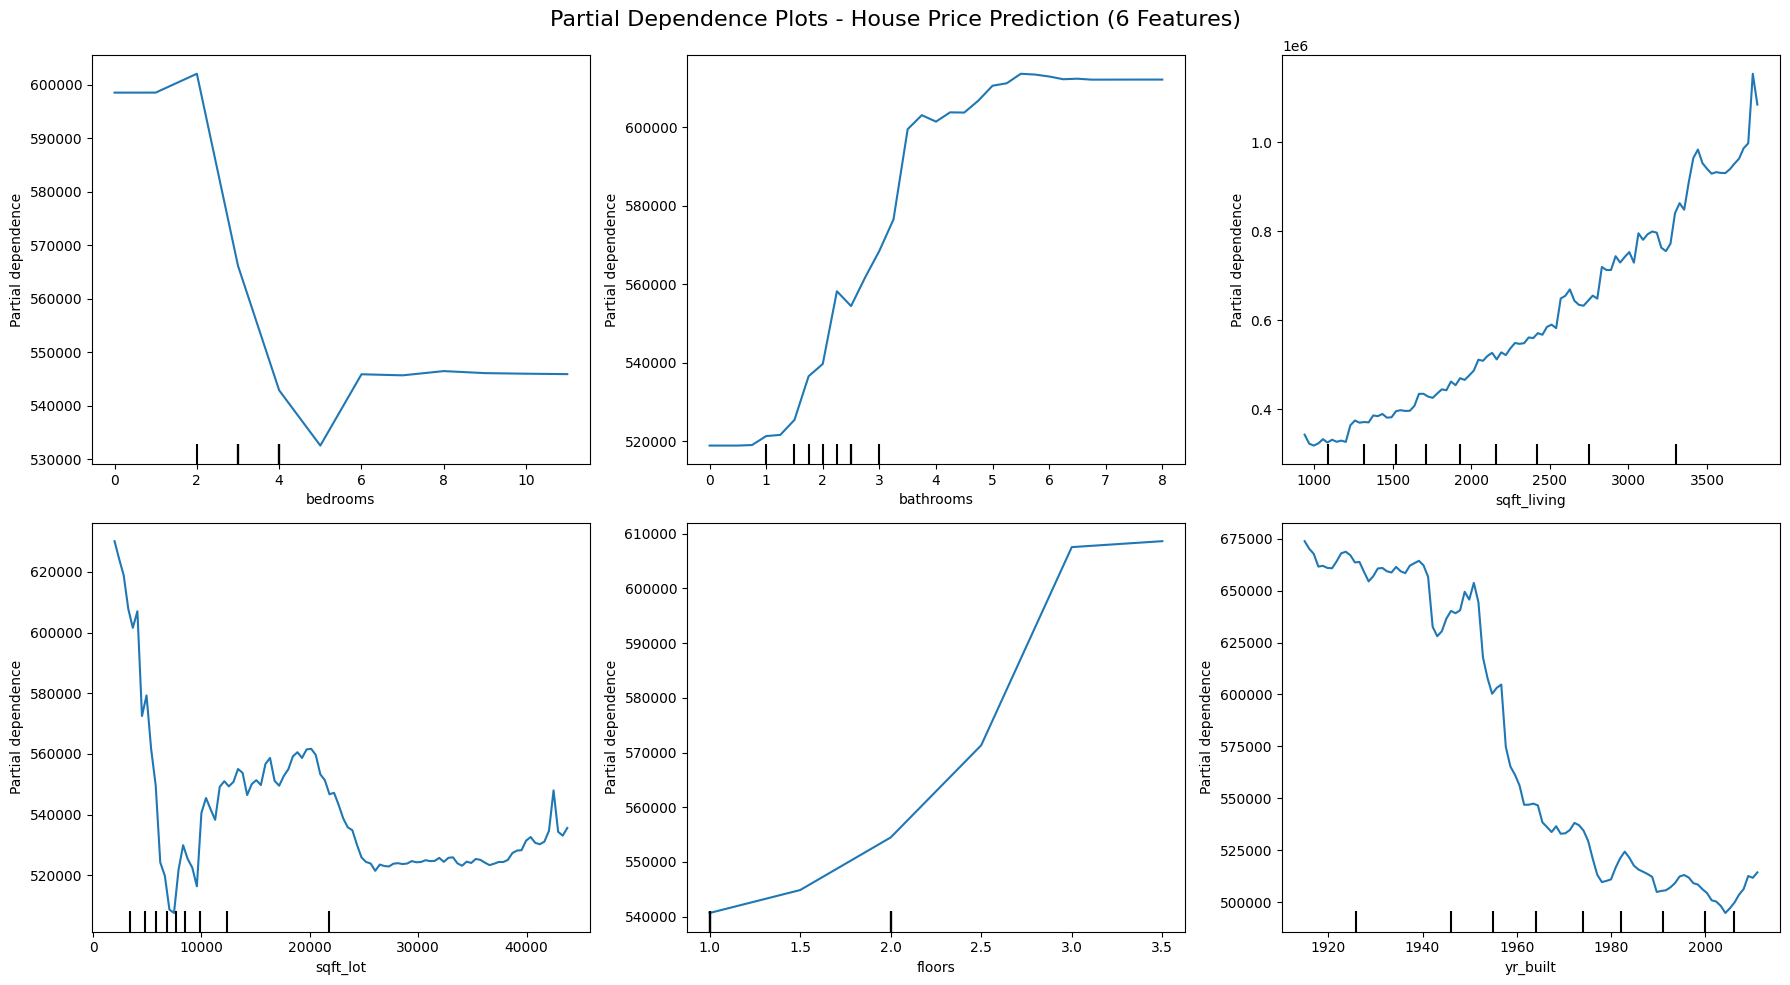

In [ ]:
# --- Librerías necesarias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# --- Cargar datos kc_house_data.csv ---
house_data = pd.read_csv("kc_house_data.csv")

# --- Variables indicadas en el ejercicio ---
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
target = 'price'

# --- Submuestreo (por rendimiento) ---
house_sample = house_data.sample(n=5000, random_state=42)

X = house_sample[features]
y = house_sample[target]

# --- Entrenar Random Forest con las 6 variables ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# --- PDP 1D para las 6 variables ---
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

PartialDependenceDisplay.from_estimator(model, X, features=['bedrooms'], ax=ax[0,0])
PartialDependenceDisplay.from_estimator(model, X, features=['bathrooms'], ax=ax[0,1])
PartialDependenceDisplay.from_estimator(model, X, features=['sqft_living'], ax=ax[0,2])
PartialDependenceDisplay.from_estimator(model, X, features=['sqft_lot'], ax=ax[1,0])
PartialDependenceDisplay.from_estimator(model, X, features=['floors'], ax=ax[1,1])
PartialDependenceDisplay.from_estimator(model, X, features=['yr_built'], ax=ax[1,2])

plt.suptitle('Partial Dependence Plots - House Price Prediction (6 Features)', fontsize=16)
plt.tight_layout()
plt.show()
